In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("3f4e534b2043e4260ad867eb184dc7be.jpg")  # Replace with your image path
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

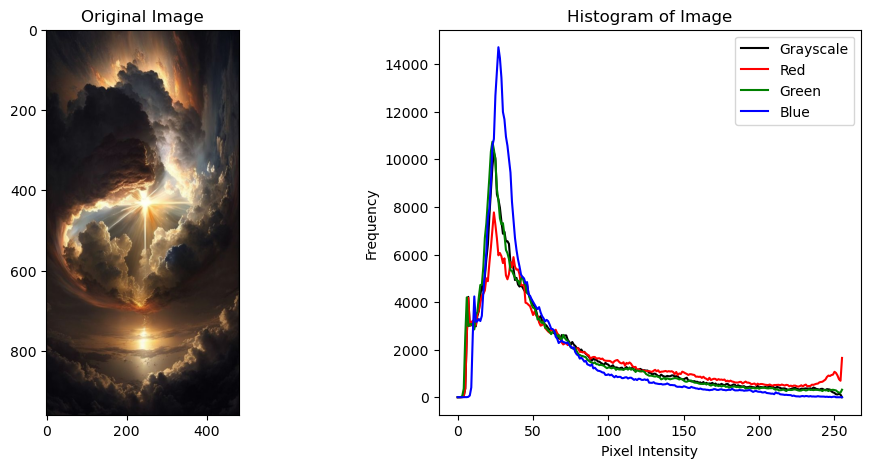

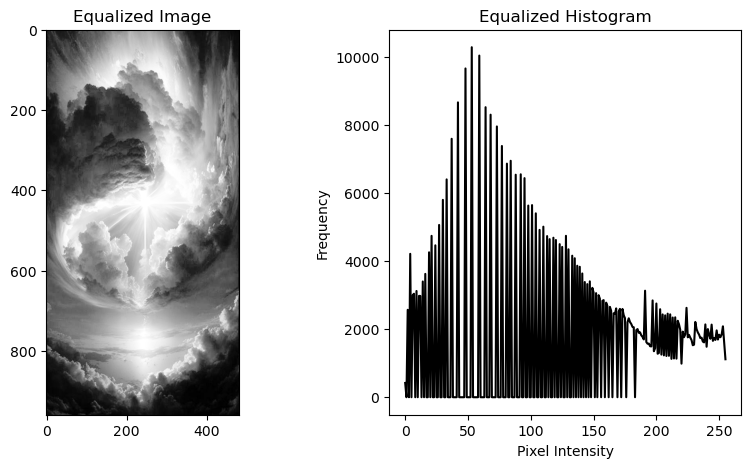

In [3]:
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])  # Red channel
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  # Green channel
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])  # Blue channel

# 3. Plot Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Show original image
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='black', label="Grayscale")
plt.plot(hist_r, color='red', label="Red")
plt.plot(hist_g, color='green', label="Green")
plt.plot(hist_b, color='blue', label="Blue")
plt.title("Histogram of Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.show()

# 4. Histogram Equalization (Contrast Enhancement)
equalized_img = cv2.equalizeHist(gray_img)

# 5. Display Equalized Image & Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image")

plt.subplot(1, 2, 2)
hist_eq = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
plt.plot(hist_eq, color='black')
plt.title("Equalized Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

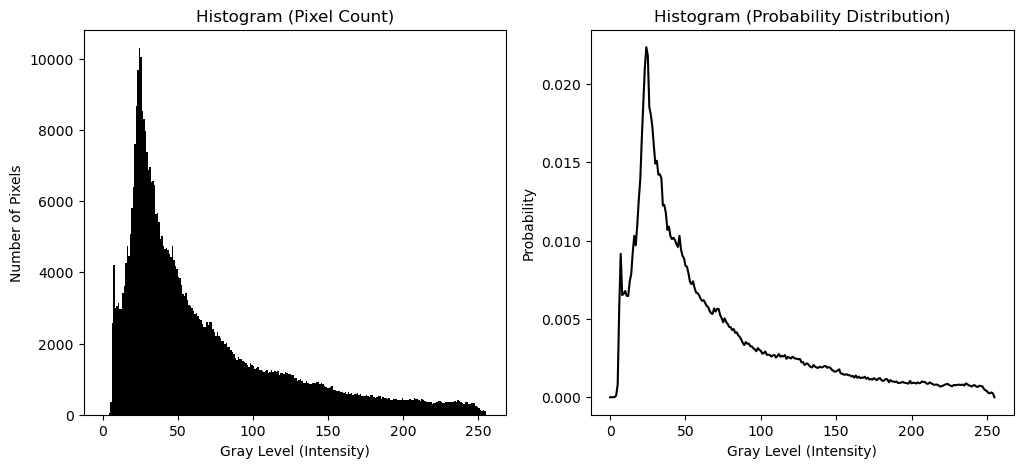

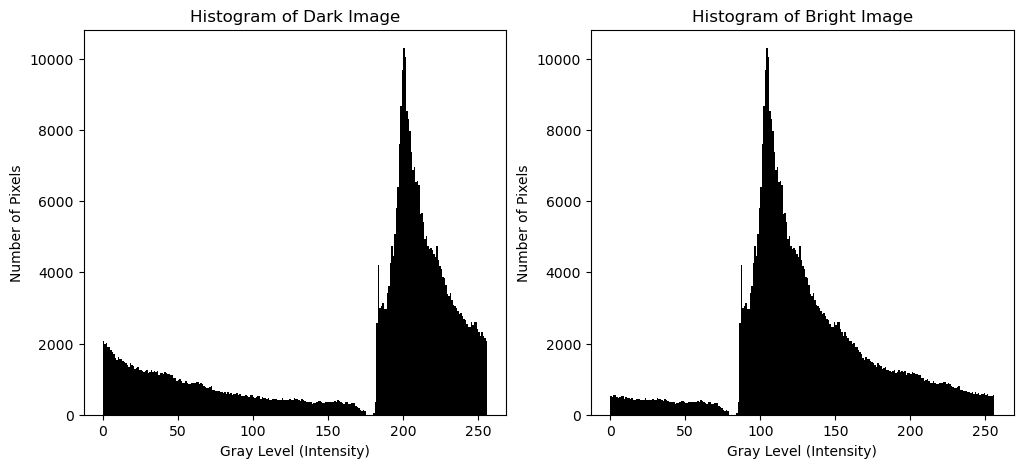

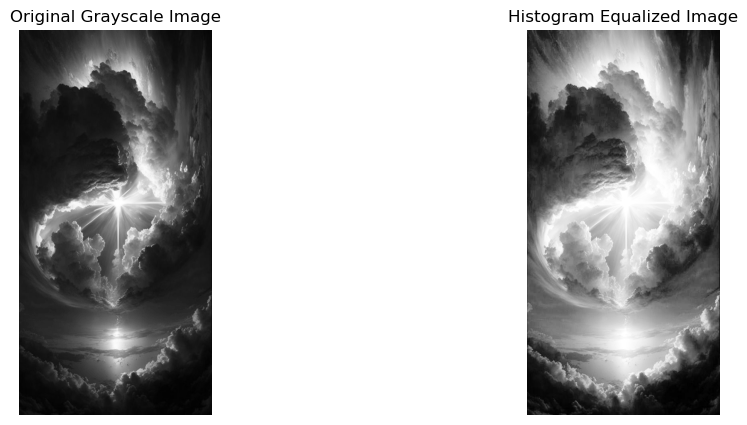

In [21]:


# Generate a synthetic color image
color_img = img

# Method 1: Histogram for grayscale image (pixel intensity count)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram (Pixel Count)')
plt.xlabel('Gray Level (Intensity)')
plt.ylabel('Number of Pixels')

# Method 2: Histogram for grayscale image (probability of occurrence)
hist, bins = np.histogram(gray_img.ravel(), 256, [0, 256])
probability = hist / hist.sum()

plt.subplot(1, 2, 2)
plt.plot(bins[:-1], probability, color='black')
plt.title('Histogram (Probability Distribution)')
plt.xlabel('Gray Level (Intensity)')
plt.ylabel('Probability')
plt.show()

# Histogram Analysis for Dark and Bright Images
dark_img = np.clip(gray_img - 80, 0, 255)  # Simulate a dark image
bright_img = np.clip(gray_img + 80, 0, 255)  # Simulate a bright image

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(dark_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Dark Image')
plt.xlabel('Gray Level (Intensity)')
plt.ylabel('Number of Pixels')

plt.subplot(1, 2, 2)
plt.hist(bright_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Bright Image')
plt.xlabel('Gray Level (Intensity)')
plt.ylabel('Number of Pixels')
plt.show()

# Histogram Equalization for Contrast Enhancement
equalized_img = cv2.equalizeHist(gray_img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

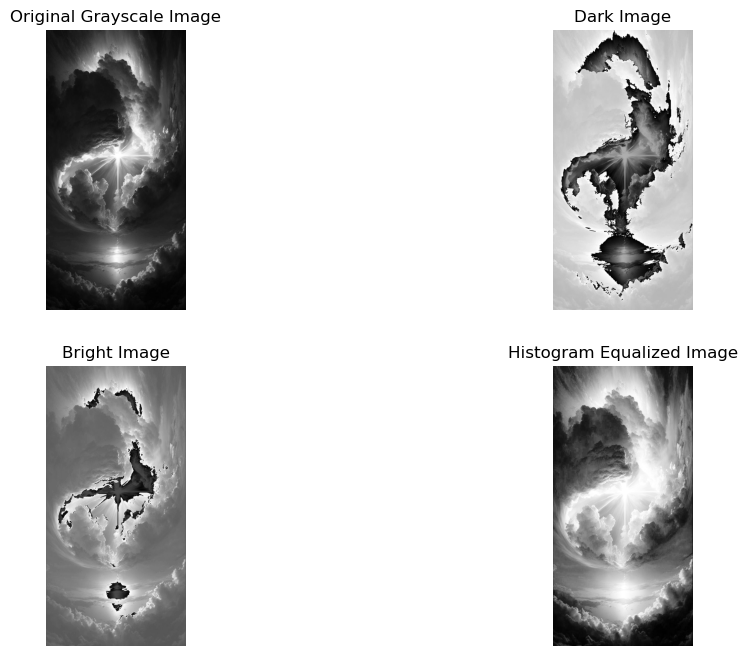

In [19]:
# Display Original, Dark, Bright, and Equalized Images

plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Dark Image
plt.subplot(2, 2, 2)
plt.imshow(dark_img, cmap='gray')
plt.title('Dark Image')
plt.axis('off')

# Bright Image
plt.subplot(2, 2, 3)
plt.imshow(bright_img, cmap='gray')
plt.title('Bright Image')
plt.axis('off')

# Histogram Equalized Image
plt.subplot(2, 2, 4)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()


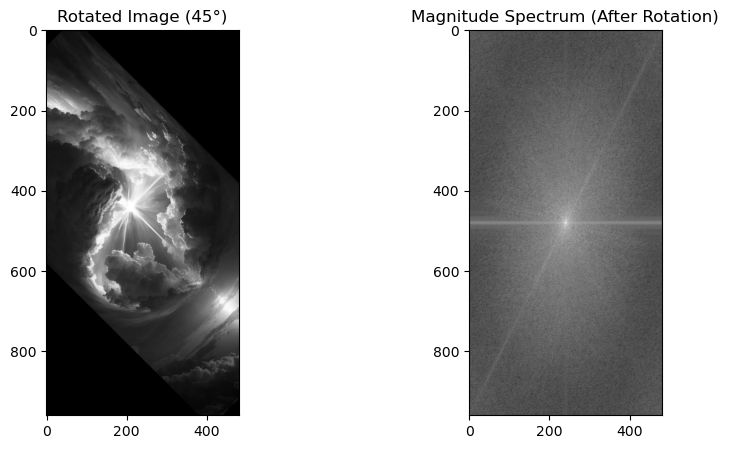

In [12]:
(h, w) = gray_img.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(gray_img, rotation_matrix, (w, h))

# 2. Compute FFT of Rotated Image
dft_rotated = np.fft.fft2(rotated_img)
dft_shift_rotated = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_shift_rotated) + 1)

# 3. Display Rotated Image & Fourier Transform
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rotated_img, cmap='gray')
plt.title("Rotated Image (45°)")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum (After Rotation)")

plt.show()

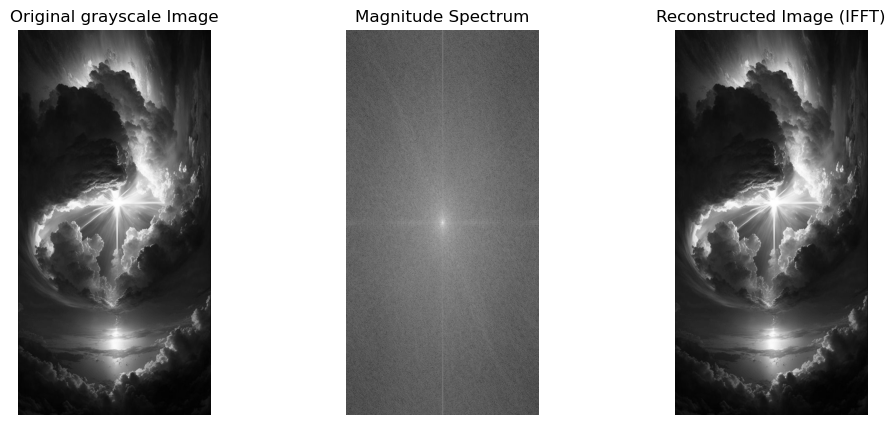

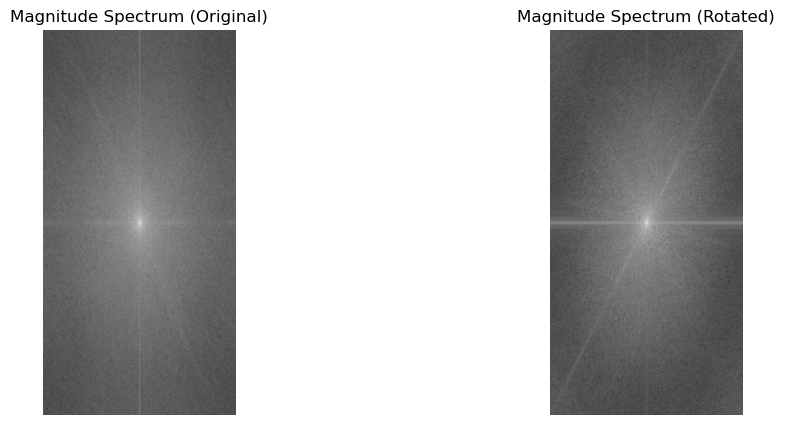

In [24]:
# Compute the Fourier Transform (FT) of an image using FFT

# Step 1: Compute the DFT using FFT
dft = np.fft.fft2(gray_img)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Avoid log(0)

# Step 2: Reconstruct the Original Image using IFFT
idft_shift = np.fft.ifftshift(dft_shift)  # Shift back
reconstructed_img = np.fft.ifft2(idft_shift).real  # Inverse FFT

# Display the Original, Magnitude Spectrum, and Reconstructed Image
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image (IFFT)')
plt.axis('off')

plt.show()

# Verify Rotation Property of Fourier Transform

# Rotate the image by 45 degrees
rows, cols = gray_img.shape
center = (cols // 2, rows // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(gray_img, rotation_matrix, (cols, rows))

# Compute the FFT of the rotated image
dft_rotated = np.fft.fft2(rotated_img)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift) + 1)

# Display Original and Rotated Magnitude Spectrum
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Original)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title('Magnitude Spectrum (Rotated)')
plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


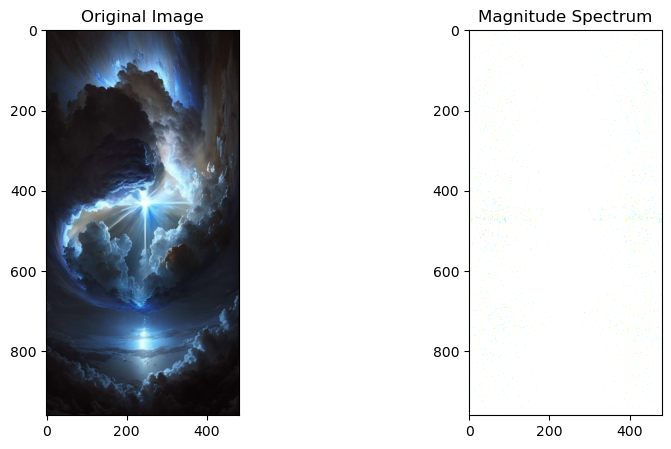